<a href="https://colab.research.google.com/github/shanikairoshi/QFL_Experiments/blob/main/Angle_Distribution_QFL_Review_Diagram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear mean (wrapped, wrong):    2.96373366834558
Circular mean (geodesic, correct): 0.010568828460480094


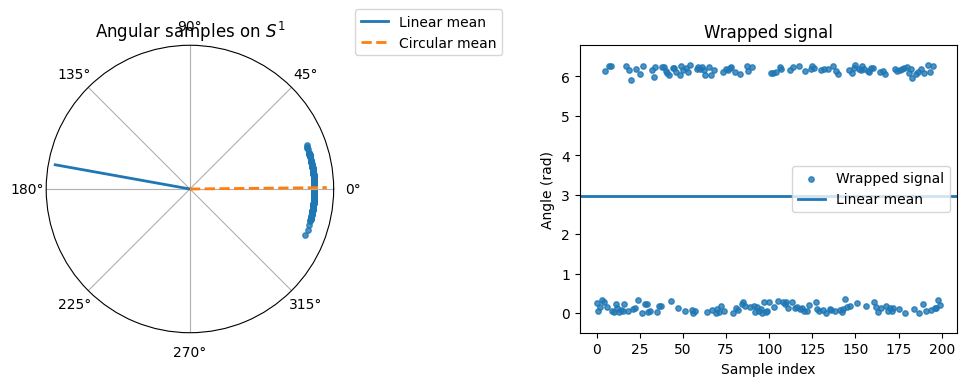

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# 1. Generate angular data
# -----------------------------
np.random.seed(0)

n_samples = 200

# Angles clustered around 0, in radians (e.g. -0.3 to 0.3)
true_angles = np.random.normal(loc=0.0, scale=0.15, size=n_samples)

# Wrap to [0, 2π)
wrapped = np.mod(true_angles, 2 * np.pi)

# -----------------------------
# 2. Linear and circular means
# -----------------------------

# (a) "Linear" mean computed on wrapped data (this is what FedAvg does)
linear_mean = wrapped.mean()

# (b) Circular (geodesic) mean on the circle S^1
#     Use complex representation e^{iθ}
z = np.exp(1j * wrapped)
circular_mean = np.angle(z.mean())   # returns value in (-π, π]

# Map circular mean to [0, 2π) for plotting on same scale as wrapped
if circular_mean < 0:
    circular_mean += 2 * np.pi

print("Linear mean (wrapped, wrong):   ", linear_mean)
print("Circular mean (geodesic, correct):", circular_mean)

# -----------------------------
# 3. Plot: Polar and Wrapped Signal
# -----------------------------
fig = plt.figure(figsize=(10, 4))

# ---- Left: polar scatter ----
ax1 = fig.add_subplot(1, 2, 1, projection="polar")

# scatter points on unit circle
ax1.scatter(wrapped, np.ones_like(wrapped), s=15, alpha=0.8)

# show linear mean (red radial line)
ax1.plot([linear_mean, linear_mean], [0, 1.1],
         linewidth=2, label="Linear mean")

# show circular mean (orange radial line)
ax1.plot([circular_mean, circular_mean], [0, 1.1],
         linewidth=2, linestyle="--", label="Circular mean")

ax1.set_title("Angular samples on $S^1$")
ax1.set_rticks([])  # hide radial ticks
ax1.legend(loc="upper left", bbox_to_anchor=(1.05, 1.15))

# ---- Right: wrapped signal vs index ----
ax2 = fig.add_subplot(1, 2, 2)

indices = np.arange(n_samples)
ax2.scatter(indices, wrapped, s=15, alpha=0.8, label="Wrapped signal")

# linear mean as horizontal red line
ax2.axhline(linear_mean, linewidth=2, label="Linear mean")

ax2.set_ylim(-0.5, 2 * np.pi + 0.5)
ax2.set_xlabel("Sample index")
ax2.set_ylabel("Angle (rad)")
ax2.set_title("Wrapped signal")
ax2.legend()

plt.tight_layout()

# Optional: save high-res figure for the paper
# plt.savefig("angle_mean_demo.png", dpi=300, bbox_inches="tight")
# plt.savefig("angle_mean_demo.pdf", bbox_inches="tight")

plt.show()


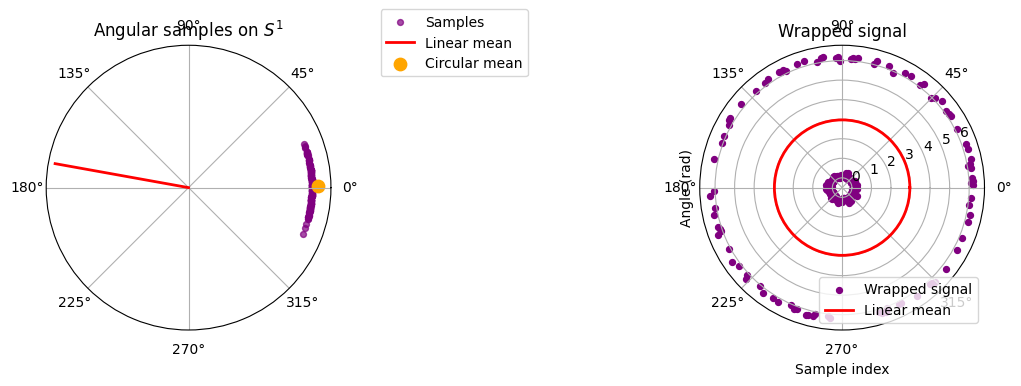

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# 1. Generate angular data
# -----------------------------
np.random.seed(0)
n_samples = 200

true_angles = np.random.normal(loc=0.0, scale=0.15, size=n_samples)
wrapped = np.mod(true_angles, 2 * np.pi)

# -----------------------------
# 2. Mean calculations
# -----------------------------
linear_mean = wrapped.mean()

z = np.exp(1j * wrapped)
circ = np.angle(z.mean())
if circ < 0:
    circ += 2 * np.pi

# -----------------------------
# 3. Plot setup
# -----------------------------
fig, axs = plt.subplots(1, 2, figsize=(12, 4),
                        subplot_kw={'projection': 'polar'} if True else {})

# -----------------------------
# LEFT: POLAR PLOT
# -----------------------------
ax = axs[0]

# Points on circle
ax.scatter(wrapped, np.ones_like(wrapped),
           s=18, color="purple", alpha=0.7, label="Samples")

# Linear mean (red line)
ax.plot([linear_mean, linear_mean], [0, 1.1],
        color="red", linewidth=2, label="Linear mean")

# Circular mean (orange dot)
ax.scatter([circ], [1.05], color="orange", s=80, marker="o", label="Circular mean")

ax.set_rticks([])
ax.set_title("Angular samples on $S^1$")
ax.legend(loc="upper left", bbox_to_anchor=(1.15, 1.15))

# -----------------------------
# RIGHT: WRAPPED SIGNAL PLOT
# -----------------------------
ax2 = axs[1] = plt.subplot(1, 2, 2)
indices = np.arange(n_samples)

ax2.scatter(indices, wrapped, s=18, color="purple", label="Wrapped signal")
ax2.axhline(linear_mean, color="red", linewidth=2, label="Linear mean")

ax2.set_ylim(-0.5, 2 * np.pi + 0.5)
ax2.set_xlabel("Sample index")
ax2.set_ylabel("Angle (rad)")
ax2.set_title("Wrapped signal")
ax2.legend()

plt.tight_layout()
plt.show()


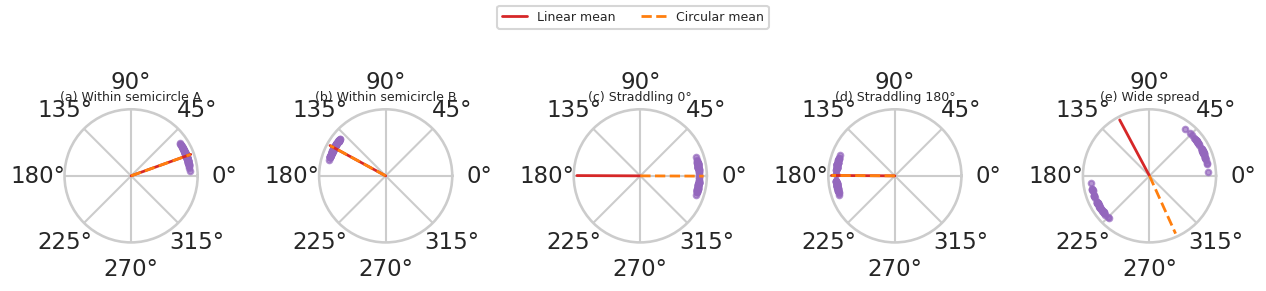

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   # <-- add this

# global style: same look as your first figure
sns.set(style="whitegrid", context="talk")   # <-- add this
# Optional: nicer fonts in PDFs/SVGs
plt.rcParams["pdf.fonttype"] = 42   # TrueType fonts
plt.rcParams["ps.fonttype"] = 42

np.random.seed(0)

# ------------------------------------------------------------------
# Helpers
# ------------------------------------------------------------------
def wrap_0_2pi(theta):
    """Wrap angles to [0, 2π)."""
    return np.mod(theta, 2 * np.pi)

def circular_mean(angles):
    """Circular / geodesic mean on S^1."""
    z = np.exp(1j * angles)
    mean_angle = np.angle(z.mean())
    return wrap_0_2pi(mean_angle)

def plot_case(ax, angles_rad, title):
    """Draw one polar subplot with samples + linear vs circular mean."""
    wrapped = wrap_0_2pi(angles_rad)
    r = np.ones_like(wrapped)

    # Samples
    ax.scatter(wrapped, r, s=16, color="tab:purple", alpha=0.7)

    # Linear (Euclidean) mean on wrapped angles  – WRONG on S^1
    lin_mean = wrapped.mean()
    ax.plot([lin_mean, lin_mean], [0, 1.08],
            color="tab:red", linewidth=2, label="Linear mean")

    # Circular (geodesic) mean – CORRECT on S^1
    circ_mean = circular_mean(wrapped)
    ax.plot([circ_mean, circ_mean], [0, 1.08],
            color="tab:orange", linewidth=2, linestyle="--",
            label="Circular mean")

    ax.set_rticks([])          # remove radial ticks
    ax.set_rlabel_position(90) # move labels out of the way
    ax.set_title(title, fontsize=9)

# ------------------------------------------------------------------
# Generate five different angular scenarios (in degrees)
# ------------------------------------------------------------------
n = 80

# (a) Within semicircle (cluster near 20°)
a_deg = np.random.normal(loc=20, scale=6, size=n)

# (b) Within semicircle (cluster near 150°)
b_deg = np.random.normal(loc=150, scale=6, size=n)

# (c) Straddling 0°  (cluster around -10° and +10°)
c1 = np.random.normal(loc=-10, scale=4, size=n//2)
c2 = np.random.normal(loc=+10, scale=4, size=n//2)
c_deg = np.concatenate([c1, c2])

# (d) Straddling 180° (cluster around 170° and -170°)
d1 = np.random.normal(loc=170, scale=4, size=n//2)
d2 = np.random.normal(loc=-170, scale=4, size=n//2)
d_deg = np.concatenate([d1, d2])

# (e) Wide spread / bimodal (30° and 210° plus noise)
e1 = np.random.normal(loc=30, scale=10, size=n//2)
e2 = np.random.normal(loc=210, scale=10, size=n//2)
e_deg = np.concatenate([e1, e2])

cases_deg = [a_deg, b_deg, c_deg, d_deg, e_deg]
titles = [
    "(a) Within semicircle A",
    "(b) Within semicircle B",
    "(c) Straddling 0°",
    "(d) Straddling 180°",
    "(e) Wide spread"
]

# Convert to radians
cases_rad = [np.deg2rad(x) for x in cases_deg]

# ------------------------------------------------------------------
# Build multi-case polar figure
# ------------------------------------------------------------------
fig, axes = plt.subplots(
    1, 5,
    subplot_kw={"projection": "polar"},
    figsize=(13, 3)
)

for ax, angles, title in zip(axes, cases_rad, titles):
    plot_case(ax, angles, title)

# Single legend for all panels
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper center", ncol=2, fontsize=9)

plt.tight_layout(rect=[0, 0, 1, 0.85])

# ------------------------------------------------------------------
# Save as vector graphics
# ------------------------------------------------------------------
fig.savefig("angle_means_multi_cases.pdf", bbox_inches="tight")  # vector
fig.savefig("angle_means_multi_cases.svg", bbox_inches="tight")  # vector

plt.show()


/tmp/ipython-input-2379955669.py:60: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: pd.Series({


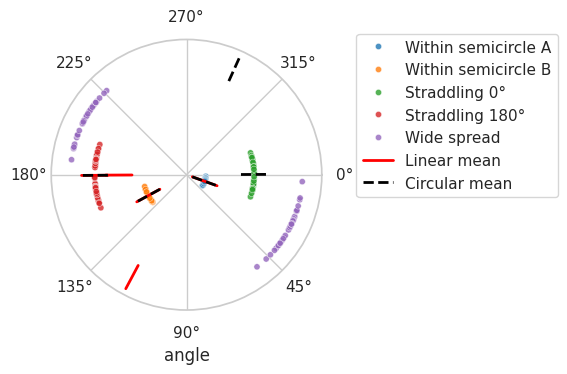

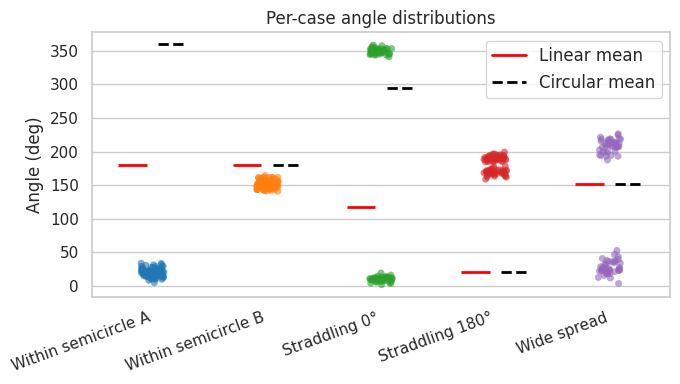

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["pdf.fonttype"] = 42
plt.rcParams["ps.fonttype"]  = 42

def wrap_0_2pi(theta):
    return np.mod(theta, 2*np.pi)

def circular_mean(angles):
    z = np.exp(1j * angles)
    m = np.angle(z.mean())
    return wrap_0_2pi(m)

# -----------------------------------------------------
# 1. Synthetic angular data for the five cases
# -----------------------------------------------------
np.random.seed(0)
n = 80

cases_deg = {}
cases_deg["Within semicircle A"] = np.random.normal(20,   6, size=n)
cases_deg["Within semicircle B"] = np.random.normal(150,  6, size=n)

c1 = np.random.normal(-10, 4, size=n//2)
c2 = np.random.normal(+10, 4, size=n//2)
cases_deg["Straddling 0°"] = np.concatenate([c1, c2])

d1 = np.random.normal(170,  4, size=n//2)
d2 = np.random.normal(-170, 4, size=n//2)
cases_deg["Straddling 180°"] = np.concatenate([d1, d2])

e1 = np.random.normal(30,  10, size=n//2)
e2 = np.random.normal(210, 10, size=n//2)
cases_deg["Wide spread"] = np.concatenate([e1, e2])

# fixed order for both plots
order = list(cases_deg.keys())
base_colors = sns.color_palette("tab10", n_colors=len(order))

# -----------------------------------------------------
# 2. Build DataFrame and summary
# -----------------------------------------------------
rows = []
base_r = 1.0
dr = 0.22

for k, name in enumerate(order):
    deg_vals = cases_deg[name]
    r = base_r + k*dr
    for ang in wrap_0_2pi(np.deg2rad(deg_vals)):
        rows.append({"case": name, "angle": ang, "radius": r})

df = pd.DataFrame(rows)

summary = (
    df.groupby("case")
      .apply(lambda g: pd.Series({
          "radius": g["radius"].iloc[0],
          "lin_mean": wrap_0_2pi(g["angle"].mean()),
          "circ_mean": circular_mean(g["angle"].values)
      }))
      .reset_index()
)
summary["lin_deg"]  = np.rad2deg(summary["lin_mean"])
summary["circ_deg"] = np.rad2deg(summary["circ_mean"])

# -----------------------------------------------------
# FIGURE 1: POLAR ONLY
# -----------------------------------------------------
sns.set(style="whitegrid")

fig1, ax1 = plt.subplots(figsize=(6, 6),
                         subplot_kw={"projection": "polar"})

sns.scatterplot(
    data=df,
    x="angle", y="radius",
    hue="case",
    hue_order=order,
    palette=base_colors,
    s=20, alpha=0.8,
    ax=ax1,
    legend=True
)

for _, row in summary.iterrows():
    r0   = row["radius"]
    lin  = row["lin_mean"]
    circ = row["circ_mean"]
    ax1.plot([lin, lin],   [r0-0.12, r0+0.12],
             color="red", linewidth=2)
    ax1.plot([circ, circ], [r0-0.12, r0+0.12],
             color="black", linestyle="--", linewidth=2)

ax1.set_rticks([])
ax1.set_rlabel_position(90)
ax1.set_theta_zero_location("E")
ax1.set_theta_direction(-1)
ax1.set_ylabel("")  # remove 'radius' to avoid overlap
#ax1.set_title("Angular client parameters on $S^1$")

# add mean legend entries
lin_handle,  = ax1.plot([], [], color="red", linewidth=2, label="Linear mean")
circ_handle, = ax1.plot([], [], color="black", linestyle="--",
                        linewidth=2, label="Circular mean")
ax1.legend(loc="upper left", bbox_to_anchor=(1.1, 1.05))

fig1.tight_layout()
fig1.savefig("QFL_polar_cases.pdf", bbox_inches="tight")
fig1.savefig("QFL_polar_cases.svg", bbox_inches="tight")

# -----------------------------------------------------
# FIGURE 2: PER-CASE ANGLE DISTRIBUTIONS ONLY
# -----------------------------------------------------
fig2, ax2 = plt.subplots(figsize=(7, 4))

df_deg = df.copy()
df_deg["angle_deg"] = np.rad2deg(df_deg["angle"])

sns.stripplot(
    data=df_deg,
    x="case", y="angle_deg",
    hue="case",
    hue_order=order,
    palette=base_colors,
    dodge=False,
    jitter=True,
    alpha=0.6,
    ax=ax2
)

# remove automatic legend from stripplot
if ax2.get_legend() is not None:
    ax2.get_legend().remove()

# overlay linear & circular means
for i, row in summary.iterrows():
    x0 = i
    ax2.hlines(row["lin_deg"],  x0-0.3, x0-0.05, colors="red", linewidth=2)
    ax2.hlines(row["circ_deg"], x0+0.05, x0+0.3,
               colors="black", linestyles="--", linewidth=2)

ax2.set_ylabel("Angle (deg)")
ax2.set_xlabel("")
ax2.set_xticks(range(len(order)))
ax2.set_xticklabels(order, rotation=20, ha="right")
ax2.set_title("Per-case angle distributions")

ax2.legend([lin_handle, circ_handle],
           ["Linear mean", "Circular mean"],
           loc="upper right", fontsize="12")


fig2.tight_layout()
fig2.savefig("QFL_cases_strip.pdf", bbox_inches="tight")
fig2.savefig("QFL_cases_strip.svg", bbox_inches="tight")

fig1.savefig("QFL_polar_cases.png", dpi=200, bbox_inches="tight")
#fig1.savefig("QFL_polar_cases.pdf", dpi=200, bbox_inches="tight")  # dpi only matters if rasterised

# FIGURE 2
fig2.savefig("QFL_cases_strip.png", dpi=200, bbox_inches="tight")
#fig2.savefig("QFL_cases_strip.pdf", dpi=200, bbox_inches="tight")
plt.show()


/tmp/ipython-input-652283525.py:74: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: pd.Series({


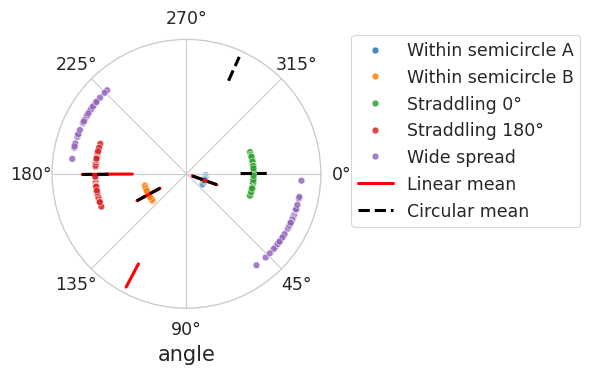

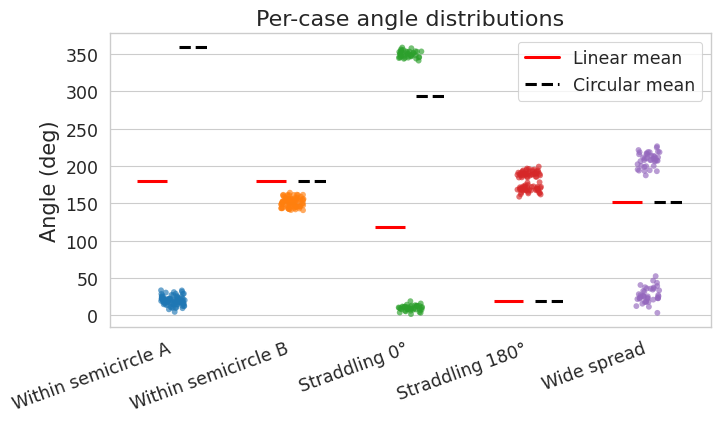

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# Paper-ready style (Seaborn + Matplotlib)
# -----------------------------
plt.rcParams["pdf.fonttype"] = 42
plt.rcParams["ps.fonttype"]  = 42

sns.set_theme(context="paper", style="whitegrid", font_scale=1.25)

plt.rcParams.update({
    "axes.titlesize": 16,
    "axes.labelsize": 15,
    "xtick.labelsize": 12.5,
    "ytick.labelsize": 12.5,
    "legend.fontsize": 12.5,
    "figure.titlesize": 16,
})

def wrap_0_2pi(theta):
    return np.mod(theta, 2*np.pi)

def circular_mean(angles):
    z = np.exp(1j * angles)
    m = np.angle(z.mean())
    return wrap_0_2pi(m)

# -----------------------------------------------------
# 1. Synthetic angular data for the five cases
# -----------------------------------------------------
np.random.seed(0)
n = 80

cases_deg = {}
cases_deg["Within semicircle A"] = np.random.normal(20,   6, size=n)
cases_deg["Within semicircle B"] = np.random.normal(150,  6, size=n)

c1 = np.random.normal(-10, 4, size=n//2)
c2 = np.random.normal(+10, 4, size=n//2)
cases_deg["Straddling 0°"] = np.concatenate([c1, c2])

d1 = np.random.normal(170,  4, size=n//2)
d2 = np.random.normal(-170, 4, size=n//2)
cases_deg["Straddling 180°"] = np.concatenate([d1, d2])

e1 = np.random.normal(30,  10, size=n//2)
e2 = np.random.normal(210, 10, size=n//2)
cases_deg["Wide spread"] = np.concatenate([e1, e2])

# fixed order for both plots
order = list(cases_deg.keys())
base_colors = sns.color_palette("tab10", n_colors=len(order))

# -----------------------------------------------------
# 2. Build DataFrame and summary
# -----------------------------------------------------
rows = []
base_r = 1.0
dr = 0.22

for k, name in enumerate(order):
    deg_vals = cases_deg[name]
    r = base_r + k*dr
    for ang in wrap_0_2pi(np.deg2rad(deg_vals)):
        rows.append({"case": name, "angle": ang, "radius": r})

df = pd.DataFrame(rows)

summary = (
    df.groupby("case")
      .apply(lambda g: pd.Series({
          "radius": g["radius"].iloc[0],
          "lin_mean": wrap_0_2pi(g["angle"].mean()),
          "circ_mean": circular_mean(g["angle"].values)
      }))
      .reset_index()
)
summary["lin_deg"]  = np.rad2deg(summary["lin_mean"])
summary["circ_deg"] = np.rad2deg(summary["circ_mean"])

# -----------------------------------------------------
# FIGURE 1: POLAR ONLY
# -----------------------------------------------------
fig1, ax1 = plt.subplots(figsize=(6.2, 6.2),
                         subplot_kw={"projection": "polar"})

sns.scatterplot(
    data=df,
    x="angle", y="radius",
    hue="case",
    hue_order=order,
    palette=base_colors,
    s=24, alpha=0.85,
    ax=ax1,
    legend=True
)

for _, row in summary.iterrows():
    r0   = row["radius"]
    lin  = row["lin_mean"]
    circ = row["circ_mean"]
    ax1.plot([lin, lin],   [r0-0.12, r0+0.12],
             color="red", linewidth=2.2)
    ax1.plot([circ, circ], [r0-0.12, r0+0.12],
             color="black", linestyle="--", linewidth=2.2)

ax1.set_rticks([])
ax1.set_rlabel_position(90)
ax1.set_theta_zero_location("E")
ax1.set_theta_direction(-1)
ax1.set_ylabel("")

# increase polar tick label size explicitly
ax1.tick_params(axis="both", labelsize=12.5)

# add mean legend entries
lin_handle,  = ax1.plot([], [], color="red", linewidth=2.2, label="Linear mean")
circ_handle, = ax1.plot([], [], color="black", linestyle="--",
                        linewidth=2.2, label="Circular mean")

# combine case legend + mean legend cleanly
ax1.legend(loc="upper left", bbox_to_anchor=(1.08, 1.05), frameon=True)

fig1.tight_layout()
fig1.savefig("QFL_polar_cases.pdf", bbox_inches="tight")
fig1.savefig("QFL_polar_cases.svg", bbox_inches="tight")
fig1.savefig("QFL_polar_cases.png", dpi=200, bbox_inches="tight")

# -----------------------------------------------------
# FIGURE 2: PER-CASE ANGLE DISTRIBUTIONS ONLY
# -----------------------------------------------------
fig2, ax2 = plt.subplots(figsize=(7.4, 4.4))

df_deg = df.copy()
df_deg["angle_deg"] = np.rad2deg(df_deg["angle"])

sns.stripplot(
    data=df_deg,
    x="case", y="angle_deg",
    hue="case",
    hue_order=order,
    palette=base_colors,
    dodge=False,
    jitter=True,
    alpha=0.65,
    size=4.2,
    ax=ax2
)

# remove automatic legend from stripplot
if ax2.get_legend() is not None:
    ax2.get_legend().remove()

# overlay linear & circular means
for i, row in summary.iterrows():
    x0 = i
    ax2.hlines(row["lin_deg"],  x0-0.3, x0-0.05, colors="red", linewidth=2.2)
    ax2.hlines(row["circ_deg"], x0+0.05, x0+0.3,
               colors="black", linestyles="--", linewidth=2.2)

ax2.set_ylabel("Angle (deg)")
ax2.set_xlabel("")
ax2.set_xticks(range(len(order)))
ax2.set_xticklabels(order, rotation=20, ha="right")
ax2.set_title("Per-case angle distributions")

# use fresh handles for fig2 legend
lin_handle2, = ax2.plot([], [], color="red", linewidth=2.2, label="Linear mean")
circ_handle2, = ax2.plot([], [], color="black", linestyle="--",
                         linewidth=2.2, label="Circular mean")

ax2.legend(handles=[lin_handle2, circ_handle2],
           loc="upper right", frameon=True)

fig2.tight_layout()
fig2.savefig("QFL_cases_strip.pdf", bbox_inches="tight")
fig2.savefig("QFL_cases_strip.svg", bbox_inches="tight")
fig2.savefig("QFL_cases_strip.png", dpi=200, bbox_inches="tight")

plt.show()


In [6]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, SparsePauliOp

# ---------------------------------------------------
# 1. 1-qubit "QNN": |0> -- Ry(theta) -- measure Z
# ---------------------------------------------------
def exp_Z(angle: float) -> float:
    """Expectation value <Z> for circuit |0> - Ry(angle) - measure Z."""
    qc = QuantumCircuit(1)
    qc.ry(angle, 0)

    # Statevector of the circuit
    psi = Statevector.from_instruction(qc)

    # Z observable on qubit 0
    obs = SparsePauliOp.from_list([("Z", 1.0)])

    # Expectation value <psi|Z|psi>
    val = psi.expectation_value(obs)
    return float(np.real(val))


# ---------------------------------------------------
# 2. Two "clients" whose angles straddle the wrap-around
# ---------------------------------------------------
eps = 0.1
theta_1 = np.pi - eps      # client 1: near +pi
theta_2 = -np.pi + eps     # client 2: near -pi

angles = np.array([theta_1, theta_2])
weights = np.array([0.5, 0.5])  # equal weights

# Linear (Euclidean) average
theta_lin = np.sum(weights * angles)

# Circular (S¹) average
z = np.sum(weights * np.exp(1j * angles))
theta_circ = np.angle(z)  # in (-pi, pi]

# ---------------------------------------------------
# 3. Print angles and expectations
# ---------------------------------------------------
def deg(x):
    return np.rad2deg(x)

print("Client angles:")
print(f"  theta_1 = {theta_1:.3f} rad ({deg(theta_1):.2f}°)")
print(f"  theta_2 = {theta_2:.3f} rad ({deg(theta_2):.2f}°)")

print("\nAggregated angles:")
print(f"  Linear mean   = {theta_lin:.3f} rad ({deg(theta_lin):.2f}°)")
print(f"  Circular mean = {theta_circ:.3f} rad ({deg(theta_circ):.2f}°)")

print("\nExpectation <Z> for each:")
print(f"  <Z>(theta_1)       = {exp_Z(theta_1): .3f}")
print(f"  <Z>(theta_2)       = {exp_Z(theta_2): .3f}")
print(f"  <Z>(linear mean)   = {exp_Z(theta_lin): .3f}")
print(f"  <Z>(circular mean) = {exp_Z(theta_circ): .3f}")


Client angles:
  theta_1 = 3.042 rad (174.27°)
  theta_2 = -3.042 rad (-174.27°)

Aggregated angles:
  Linear mean   = 0.000 rad (0.00°)
  Circular mean = 3.142 rad (180.00°)

Expectation <Z> for each:
  <Z>(theta_1)       = -0.995
  <Z>(theta_2)       = -0.995
  <Z>(linear mean)   =  1.000
  <Z>(circular mean) = -1.000


In [8]:
import numpy as np
import pandas as pd
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, SparsePauliOp

# ---------------------------------------------------
# Helper: 1-qubit QNN = |0> -- Ry(theta) -- measure Z
# ---------------------------------------------------
def exp_Z(angle: float) -> float:
    """Expectation value <Z> for circuit |0> - Ry(angle) - Z."""
    qc = QuantumCircuit(1)
    qc.ry(angle, 0)
    psi = Statevector.from_instruction(qc)
    obs = SparsePauliOp.from_list([("Z", 1.0)])
    val = psi.expectation_value(obs)
    return float(np.real(val))


def deg(x):
    return np.rad2deg(x)


# ---------------------------------------------------
# Define some synthetic client angle sets
# ---------------------------------------------------
cases = {
    # small cluster around 0  -> linear ≈ circular
    "A_small_cluster_0": [0.10, -0.20, 0.05],

    # your wrap-around example: near +pi and -pi
    "B_wrap_two_clients": [np.pi - 0.10, -np.pi + 0.10],

    # moderate spread, not wrapping (around 0)
    "C_mid_spread": [-1.5, 0.0, 1.5],

    # wrap-around with three clients near ±pi
    "D_wrap_three": [np.pi - 0.20, -np.pi + 0.15, np.pi - 0.05],
}

rows = []

for name, ang_list in cases.items():
    angles = np.array(ang_list, dtype=float)
    K = len(angles)
    weights = np.ones(K) / K

    # Linear mean in R
    theta_lin = np.sum(weights * angles)

    # Circular mean on S^1
    z = np.sum(weights * np.exp(1j * angles))
    theta_circ = np.angle(z)  # in (-pi, pi]

    # Expectations
    client_exps = np.array([exp_Z(a) for a in angles])
    exp_lin = exp_Z(theta_lin)
    exp_circ = exp_Z(theta_circ)

    rows.append({
        "case": name,
        "K_clients": K,
        "angles_deg": ", ".join(f"{deg(a):.1f}" for a in angles),
        "lin_mean_deg": deg(theta_lin),
        "circ_mean_deg": deg(theta_circ),
        "client_Z_mean": client_exps.mean(),
        "client_Z_min": client_exps.min(),
        "client_Z_max": client_exps.max(),
        "Z_lin": exp_lin,
        "Z_circ": exp_circ,
    })

df = pd.DataFrame(rows)
pd.set_option("display.max_colwidth", 120)
print(df.to_string(index=False))


              case  K_clients           angles_deg  lin_mean_deg  circ_mean_deg  client_Z_mean  client_Z_min  client_Z_max    Z_lin    Z_circ
 A_small_cluster_0          3      5.7, -11.5, 2.9     -0.954930      -0.941225       0.991274      0.980067      0.998750 0.999861  0.999865
B_wrap_two_clients          2        174.3, -174.3      0.000000     180.000000      -0.995004     -0.995004     -0.995004 1.000000 -1.000000
      C_mid_spread          3     -85.9, 0.0, 85.9      0.000000       0.000000       0.380491      0.070737      1.000000 1.000000  1.000000
      D_wrap_three          3 168.5, -171.4, 177.1     58.090141     178.085240      -0.989196     -0.998750     -0.980067 0.528584 -0.999442


Run in real IBM

In [ ]:
#API key
#RIadfF1XXTld3X42EIdMKka8eVlX76xUZPv4Vq0o2zBc

In [14]:
# Run once in some environment (not every session):
from qiskit_ibm_runtime import QiskitRuntimeService
QiskitRuntimeService.save_account(channel="ibm_quantum_platform", token="RIadfF1XXTld3X42EIdMKka8eVlX76xUZPv4Vq0o2zBc", overwrite=True)

In [18]:
QiskitRuntimeService(instance="crn:v1:bluemix:public:quantum-computing:us-east:a/689186a694e84c9abc5dc79bf421c1a6:9489d7fe-78ad-4b2c-b300-dde4d6b1db43::")
service.backends()

qiskit_runtime_service.backends:WARNING:2025-12-12 01:31:01,610: Loading instance: open-instance, plan: open


[<IBMBackend('ibm_fez')>,
 <IBMBackend('ibm_marrakesh')>,
 <IBMBackend('ibm_torino')>]

In [19]:
!pip install qiskit-ibm-runtime
import numpy as np
import pandas as pd
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, SparsePauliOp

# ---------------------------------------------------
# Simulator helper: |0> -- Ry(theta) -- Z expectation
# ---------------------------------------------------
def exp_Z_sim(angle: float) -> float:
    qc = QuantumCircuit(1)
    qc.ry(angle, 0)
    psi = Statevector.from_instruction(qc)
    obs = SparsePauliOp.from_list([("Z", 1.0)])
    val = psi.expectation_value(obs)
    return float(np.real(val))

def deg(x):
    return np.rad2deg(x)

# Same synthetic client angle sets
cases = {
    "A_small_cluster_0":  [0.10, -0.20, 0.05],
    "B_wrap_two_clients": [np.pi - 0.10, -np.pi + 0.10],
    "C_mid_spread":       [-1.5, 0.0, 1.5],
    "D_wrap_three":       [np.pi - 0.20, -np.pi + 0.15, np.pi - 0.05],
}



from qiskit.circuit import Parameter
from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService, EstimatorV2 as Estimator

# ---------------------------------------------------
# 1. Connect and choose backend
# ---------------------------------------------------
from qiskit_ibm_runtime import QiskitRuntimeService, EstimatorV2 as Estimator
from qiskit.transpiler import generate_preset_pass_manager

service = QiskitRuntimeService()

# OLD: simulator
# backend = service.backend("ibm_qasm_simulator")

backend = service.least_busy(
    operational=True,
    simulator=False,    # <- exclude simulators
    min_num_qubits=1    # <- we only need 1 qubit for this Ry example
)
print("Using backend:", backend.name)

backend = service.backend("ibm_fez")   # or any available real backend name

for b in service.backends(operational=True, simulator=False):
    print(b.name, b.num_qubits)



qiskit_runtime_service.__init__:WARNING:2025-12-12 01:31:23,164: Instance was not set at service instantiation. Free and trial plan instances will be prioritized. Based on the following filters: (tags: None, region: us-east, eu-de), and available plans: (open), the available account instances are: open-instance. If you need a specific instance set it explicitly either by using a saved account with a saved default instance or passing it in directly to QiskitRuntimeService().
qiskit_runtime_service.backends:WARNING:2025-12-12 01:31:23,696: Loading instance: open-instance, plan: open
qiskit_runtime_service.backends:WARNING:2025-12-12 01:31:26,367: Using instance: open-instance, plan: open
qiskit_runtime_service.backends:WARNING:2025-12-12 01:31:26,371: Using instance: open-instance, plan: open
qiskit_runtime_service.backends:WARNING:2025-12-12 01:31:26,378: Loading instance: open-instance, plan: open


Using backend: ibm_torino
ibm_fez 156
ibm_marrakesh 156
ibm_torino 133


In [20]:
# ---------------------------------------------------
# 2. Build parametric circuit and observable
# ---------------------------------------------------
theta = Parameter("theta")

qc_param = QuantumCircuit(1)
qc_param.ry(theta, 0)

obs = SparsePauliOp.from_list([("Z", 1.0)])

# Transpile to ISA form for the backend
pm = generate_preset_pass_manager(optimization_level=1, backend=backend)
isa_circuit = pm.run(qc_param)
isa_observable = obs.apply_layout(isa_circuit.layout)

# ---------------------------------------------------
# 3. Runtime Estimator primitive
# ---------------------------------------------------
estimator = Estimator(mode=backend, options={"resilience_level": 0})
estimator.options.default_shots = 4096  # adjust if you like

def exp_Z_ibm(angle: float) -> float:
    """
    Hardware/Runtime-based <Z> for |0> -- Ry(angle) -- Z.
    Returns expectation estimated from shots on the chosen backend.
    """
    pubs = [(isa_circuit, isa_observable, [float(angle)])]
    job = estimator.run(pubs)
    result = job.result()
    # EstimatorV2: result is a list of EstimatorResult objects
    ev = float(np.asarray(result[0].data.evs).ravel()[0])
    return ev

rows = []

for name, ang_list in cases.items():
    angles = np.array(ang_list, dtype=float)
    K = len(angles)
    weights = np.ones(K) / K

    # Aggregation in parameter space
    theta_lin = np.sum(weights * angles)
    z = np.sum(weights * np.exp(1j * angles))
    theta_circ = np.angle(z)  # circular mean in (-pi, pi]

    # ---- Simulator expectations ----
    client_exps_sim = np.array([exp_Z_sim(a) for a in angles])
    Z_lin_sim = exp_Z_sim(theta_lin)
    Z_circ_sim = exp_Z_sim(theta_circ)

    # ---- IBM Runtime expectations ----
    client_exps_ibm = np.array([exp_Z_ibm(a) for a in angles])
    Z_lin_ibm = exp_Z_ibm(theta_lin)
    Z_circ_ibm = exp_Z_ibm(theta_circ)

    rows.append({
        "case": name,
        "K_clients": K,
        "angles_deg": ", ".join(f"{deg(a):.1f}" for a in angles),
        "lin_mean_deg": deg(theta_lin),
        "circ_mean_deg": deg(theta_circ),

        "client_Z_mean_sim":  client_exps_sim.mean(),
        "client_Z_mean_ibm":  client_exps_ibm.mean(),

        "Z_lin_sim":   Z_lin_sim,
        "Z_circ_sim":  Z_circ_sim,
        "Z_lin_ibm":   Z_lin_ibm,
        "Z_circ_ibm":  Z_circ_ibm,
    })

df = pd.DataFrame(rows)
pd.set_option("display.max_colwidth", 120)
print(df.to_string(index=False, float_format=lambda x: f"{x: .3f}"))

              case  K_clients           angles_deg  lin_mean_deg  circ_mean_deg  client_Z_mean_sim  client_Z_mean_ibm  Z_lin_sim  Z_circ_sim  Z_lin_ibm  Z_circ_ibm
 A_small_cluster_0          3      5.7, -11.5, 2.9        -0.955         -0.941              0.991              0.988      1.000       1.000      0.994       0.995
B_wrap_two_clients          2        174.3, -174.3         0.000        180.000             -0.995             -0.965      1.000      -1.000      0.996      -0.973
      C_mid_spread          3     -85.9, 0.0, 85.9         0.000          0.000              0.380              0.394      1.000       1.000      0.997       0.994
      D_wrap_three          3 168.5, -171.4, 177.1        58.090        178.085             -0.989             -0.960      0.529      -0.999      0.554      -0.968
